In [1]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer

In [5]:
df = pd.read_csv('train.csv', usecols=['Age', 'Fare', 'Survived'])

In [7]:
df.dropna(inplace=True) # dropped missing value rows

In [9]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [11]:
df.shape

(714, 3)

In [13]:
X = df.iloc[:, 1:]
y = df.iloc[:,0]

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [17]:
X_train.head()

,Age,Fare
328,31.0,20.5250
73,26.0,14.4542
253,30.0,16.1000
719,33.0,7.7750
666,25.0,13.0000


In [19]:
clf = DecisionTreeClassifier()

In [21]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [23]:
accuracy_score(y_test, y_pred)

0.6223776223776224

In [25]:
# cross validation
np.mean(cross_val_score(DecisionTreeClassifier(), X, y, cv=10, scoring='accuracy'))

0.6359154929577465

In [71]:
# creating bins for 'age' and 'fare'
kbin_age = KBinsDiscretizer(n_bins=15, encode='ordinal', strategy='quantile')
kbin_fare = KBinsDiscretizer(n_bins=15, encode='ordinal', strategy='quantile')

In [73]:
# transforming numerical data into quantiles
trf = ColumnTransformer([
    ('first', kbin_age, [0]),
    ('second', kbin_fare, [1])
])

In [75]:
X_train_trf = trf.fit_transform(X_train)
X_test_trf = trf.transform(X_test)

In [77]:
# for 'age'
trf.named_transformers_['first'].n_bins_ # to see bins count

array([15])

In [79]:
# bins range
trf.named_transformers_['first'].bin_edges_

array([array([ 0.42,  6.  , 16.  , 19.  , 21.  , 23.  , 25.  , 28.  , 30.  ,
              32.  , 35.  , 38.  , 42.  , 47.  , 54.  , 80.  ])             ],
      dtype=object)

In [81]:
# for 'fare'
trf.named_transformers_['second'].n_bins_

array([15])

In [83]:
# bins range
trf.named_transformers_['second'].bin_edges_

array([array([  0.    ,   7.25  ,   7.775 ,   7.8958,   8.1583,  10.5   ,
               13.    ,  14.4542,  18.75  ,  26.    ,  26.55  ,  31.275 ,
               51.4792,  76.2917, 108.9   , 512.3292])                   ],
      dtype=object)

In [85]:
# comparing values before and after applying transformation
output = pd.DataFrame({
    'age': X_train['Age'],
    'age_trf': X_train_trf[:,0],
    'fare': X_train['Fare'],
    'fare_trf': X_train_trf[:, 1]
})

In [87]:
output['age_labels'] = pd.cut(x=X_train['Age'],
                              bins = trf.named_transformers_['first'].bin_edges_[0].tolist())
output['fare_labels'] = pd.cut(x=X_train['Fare'],
                              bins = trf.named_transformers_['second'].bin_edges_[0].tolist())

In [89]:
output.sample(5)

,age,age_trf,fare,fare_trf,age_labels,fare_labels
161,40.0,11.0,15.7500,7.0,"(38.0, 42.0]","(14.454, 18.75]"
835,39.0,11.0,83.1583,13.0,"(38.0, 42.0]","(76.292, 108.9]"
861,21.0,4.0,11.5000,5.0,"(19.0, 21.0]","(10.5, 13.0]"
660,50.0,13.0,133.6500,14.0,"(47.0, 54.0]","(108.9, 512.329]"
834,18.0,2.0,8.3000,4.0,"(16.0, 19.0]","(8.158, 10.5]"


In [91]:
# applying decision tree on transformed data
clf = DecisionTreeClassifier()
clf.fit(X_train_trf, y_train)
y_pred2 = clf.predict(X_test_trf)

In [93]:
accuracy_score(y_test, y_pred2)

0.6363636363636364

In [95]:
X_trf = trf.fit_transform(X)
np.mean(cross_val_score(DecisionTreeClassifier(), X, y, cv=10, scoring='accuracy'))

0.6373239436619718

In [111]:
def discretize(bins, strategy):
    kbin_age = KBinsDiscretizer(n_bins=15, encode='ordinal', strategy=strategy)
    kbin_fare = KBinsDiscretizer(n_bins=15, encode='ordinal', strategy=strategy)

    trf = ColumnTransformer([
        ('first', kbin_age, [0]),
        ('second', kbin_fare, [1])
    ])

    X_trf = trf.fit_transform(X)
    print(np.mean(cross_val_score(DecisionTreeClassifier(), X, y, cv=10, scoring='accuracy')))

    print('\nAge')
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Age'])
    plt.title('Before')

    plt.subplot(122)
    plt.hist(X_trf[:, 0], color='red')
    plt.title('After')

    plt.show()

    print('\nFare')
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Fare'])
    plt.title('Before')

    plt.subplot(122)
    plt.hist(X_trf[:, 1], color='red')
    plt.title('After')

    plt.show()

## Quantile Binning

0.6359546165884195

Age


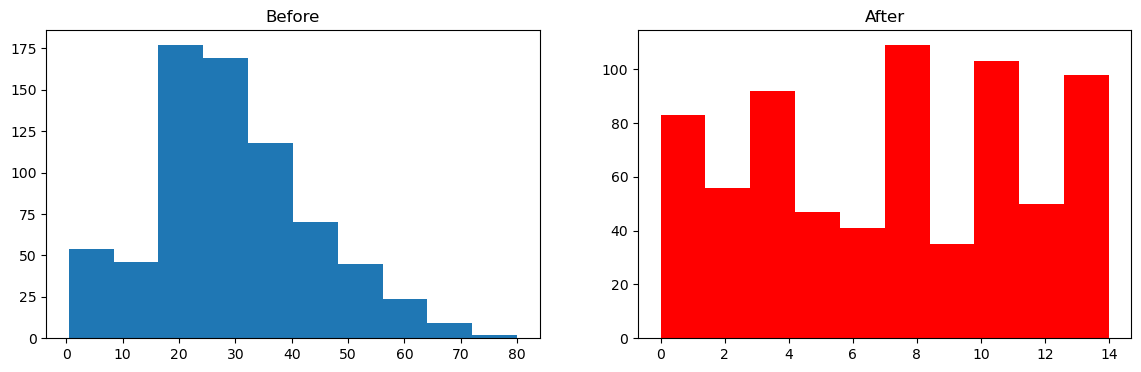


Fare


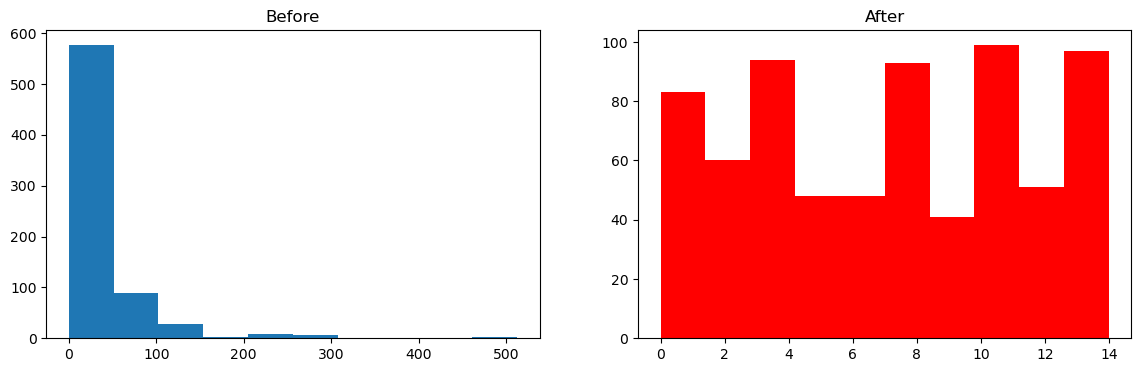

In [113]:
discretize(10, 'quantile')

## Uniform Binning

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\preprocessing\_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\preprocessing\_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


0.6372848200312988

Age


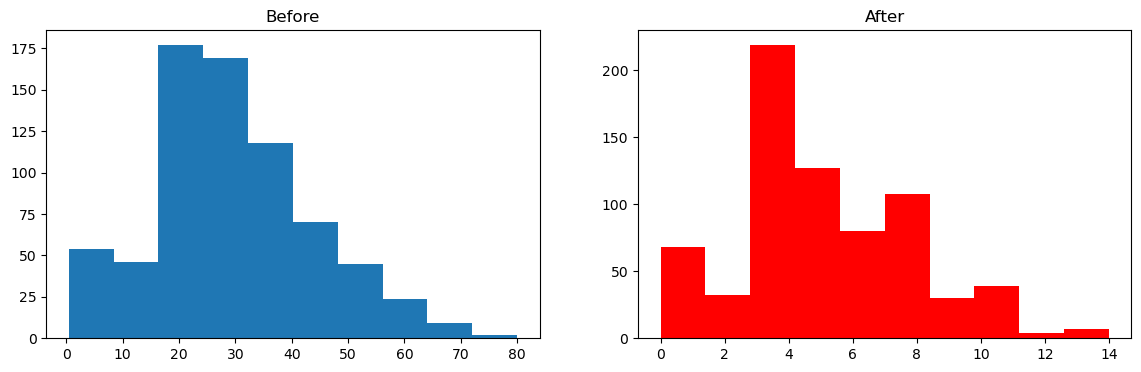


Fare


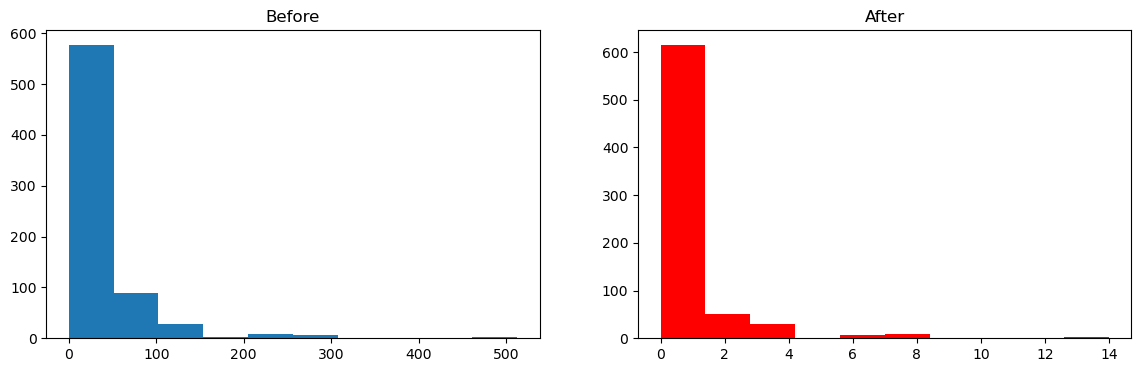

In [115]:
discretize(10, 'uniform')

## K-Means Binning

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\preprocessing\_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\preprocessing\_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known t

0.6331181533646322

Age


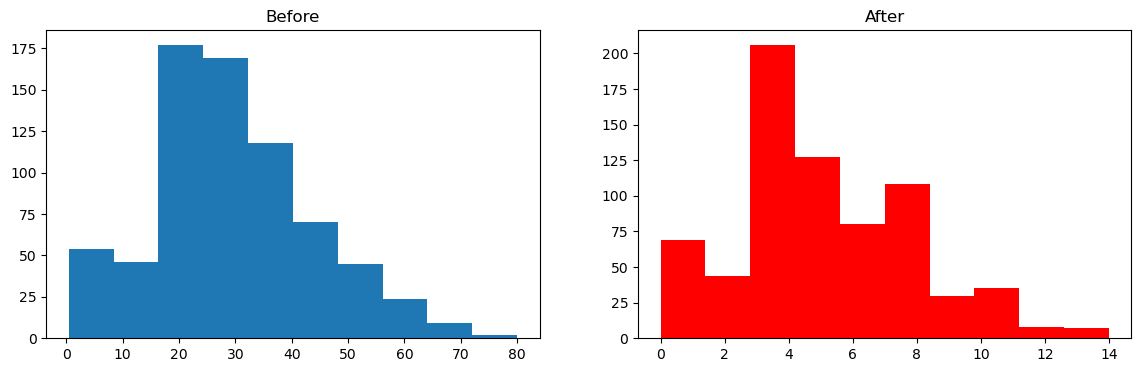


Fare


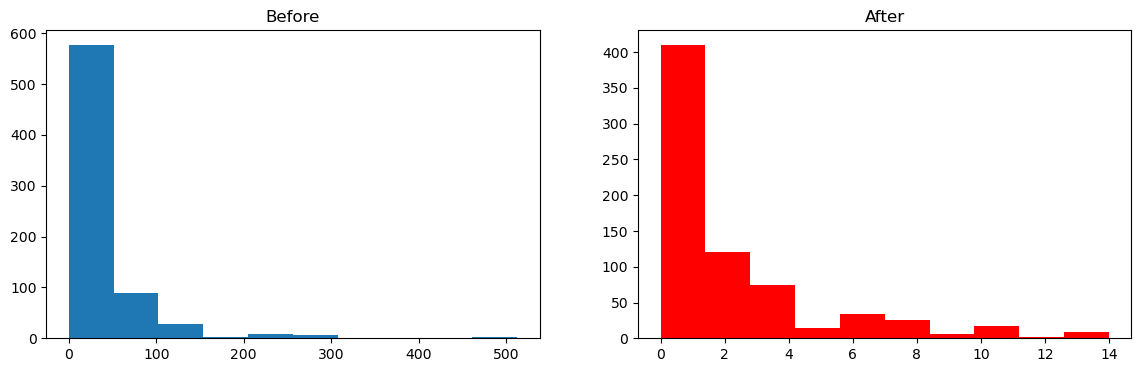

In [120]:
discretize(15, 'kmeans')